In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from pbcpy.base import Cell
from pbcpy.grid import Grid

In [3]:
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space
from pbcpy.base import Coord
from pbcpy.system import System

In [4]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

# Aluminium with local PP

In [5]:
rho_mol = PP('Local_Pseudopotentials/Al_fde_rho.pp').read()

In [6]:
v_t_mol = PP('Local_Pseudopotentials/Al_vt_rhotot_alph.pp').read()

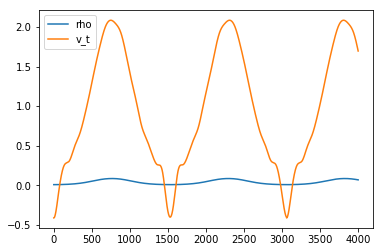

In [7]:
x0 = rho_mol.ions[0].pos
r0 = 10*Coord(pos=[0.0,0.0,1.0], cell= rho_mol.cell)
x1 = v_t_mol.ions[0].pos
r1 = 10*Coord(pos=[0.0,0.0,1.0], cell= v_t_mol.cell)
plotcut_1D_dens = rho_mol.plot.get_plotcut(x0=x0, r0=r0, nr = 4000)
plotcut_1D_v_t = v_t_mol.plot.get_plotcut(x0=x0, r0=r0, nr = 4000)
plt.plot(plotcut_1D_dens.values, label = 'rho')
plt.plot(plotcut_1D_v_t.values, label = 'v_t')
plt.legend()
plt.show()

In [8]:
density = rho_mol.plot
v_t = v_t_mol.plot
type(density), type(v_t)

(pbcpy.grid_functions.Grid_Function_Base,
 pbcpy.grid_functions.Grid_Function_Base)

In [9]:
grid_real_rho = Grid_Space(density.grid.at,density.grid.nr)
grid_real_vt = Grid_Space(v_t.grid.at,density.grid.nr)

mydens = Grid_Function(grid_real_rho,griddata_3d=density.values)
myvt = Grid_Function(grid_real_vt,griddata_3d=v_t.values)

* First tries of mashine learning

In [10]:
np.shape(mydens.values), np.shape(myvt.values)

((45, 45, 45), (45, 45, 45))

In [11]:
x = np.reshape(mydens.values,(np.shape(mydens.values)[0]*np.shape(mydens.values)[1]*np.shape(mydens.values)[2],))
y = np.reshape(myvt.values, (np.shape(myvt.values)[0]*np.shape(myvt.values)[1]*np.shape(myvt.values)[2],))

In [12]:
np.shape(x),np.shape(y)

((91125,), (91125,))

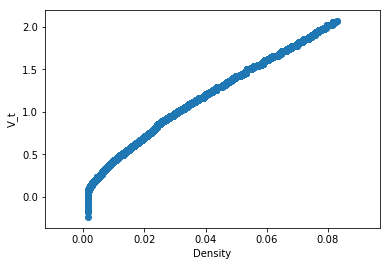

(array([45585, 47610, 45540, ..., 89134,    11,    34]),
 array([    0,    22,    23, ..., 89134,    11,    34]))

In [13]:
indx  = np.argsort(x)
indx2 = np.argsort(y)
X=x[indx]
Y=y[indx2]
plt.scatter(X,Y)
plt.xlabel('Density')
plt.ylabel('V_t')
plt.show()

indx, indx2

In [14]:
# must reshape due to a glitch in sklearn
X=np.reshape(X,(np.shape(X)[0],1))
Y=np.reshape(Y,(np.shape(Y)[0],1))

np.shape(X), np.shape(Y), X

((91125, 1), (91125, 1), array([[ 0.00153427],
        [ 0.00153427],
        [ 0.00153427],
        ..., 
        [ 0.08236803],
        [ 0.08302176],
        [ 0.08302177]]))

In [15]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.score(X,Y)

0.98169963048945075

In [17]:
acc = model.predict(X)-Y

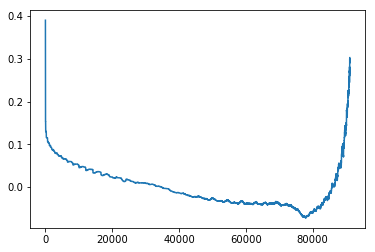

In [18]:
plt.plot(acc)
plt.show()

## Let's try some neural networks

In [19]:
from sklearn.neural_network import MLPRegressor

In [88]:
model2 = MLPRegressor(hidden_layer_sizes=(100,100), alpha=0.01)

In [89]:
y2 = np.reshape(Y, len(Y))
y2

array([-0.23087692, -0.1743535 , -0.1743528 , ...,  2.05595818,
        2.06110159,  2.06110177])

In [90]:
model2.fit(X,y2)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [91]:
model2.score(X,Y)

0.99777767450405142

In [92]:
acc2 = model2.predict(X)-y2
np.shape(y2)

(91125,)

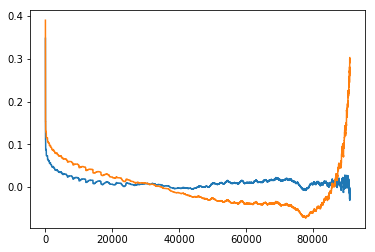

In [93]:
plt.plot(acc2)
plt.plot(acc)

plt.show()

## Let's try some Kernel Ridge Regression

In [79]:
from sklearn.kernel_ridge import KernelRidge

In [83]:
model3 = KernelRidge()

In [85]:
np.shape(X), np.shape(Y)

((91125, 1), (91125, 1))